<a href="https://colab.research.google.com/github/shubham953/Delhivery--Feature-Engineering/blob/main/Cancer_detection_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, cross_validate,train_test_split
from sklearn.preprocessing import   StandardScaler
from sklearn.metrics import r2_score, confusion_matrix , classification_report, precision_score, accuracy_score,f1_score


In [4]:
!pip install xgboost

In [5]:
from xgboost import XGBClassifier

In [6]:
df = pd.read_csv("data.csv")

In [7]:
df.shape

(569, 33)

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
df.drop(columns = ["Unnamed: 32","id"],axis=1,inplace = True)

In [12]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
df_numeric = df.select_dtypes("number")

In [14]:
columns= df_numeric.columns

In [15]:
(df.isna().mean())*100

,0
diagnosis,0.0
radius_mean,0.0
texture_mean,0.0
perimeter_mean,0.0
area_mean,0.0
smoothness_mean,0.0
compactness_mean,0.0
concavity_mean,0.0
concave points_mean,0.0
symmetry_mean,0.0


<Axes: xlabel='diagnosis', ylabel='count'>

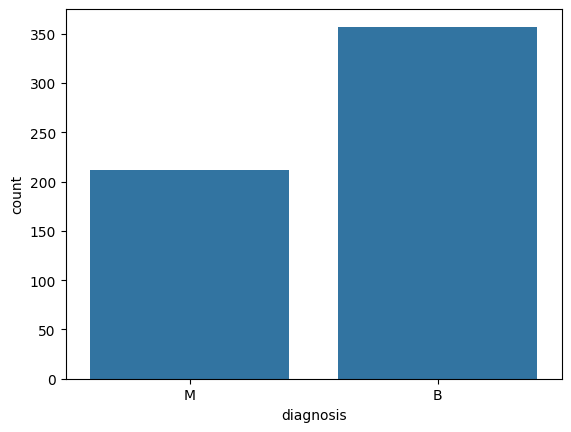

In [16]:
sns.countplot(x='diagnosis', data = df )

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

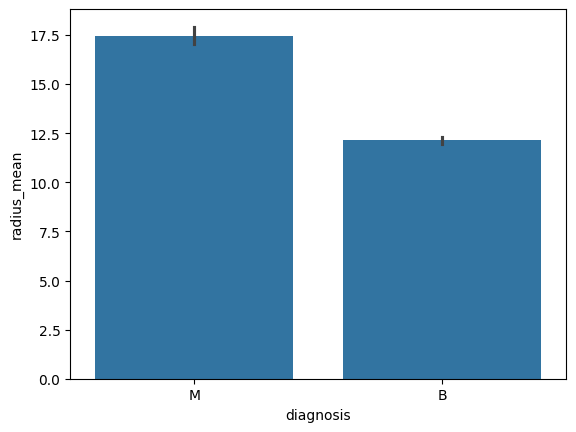

In [17]:
sns.barplot(x='diagnosis',y='radius_mean',data=df)

<Axes: xlabel='diagnosis', ylabel='area_mean'>

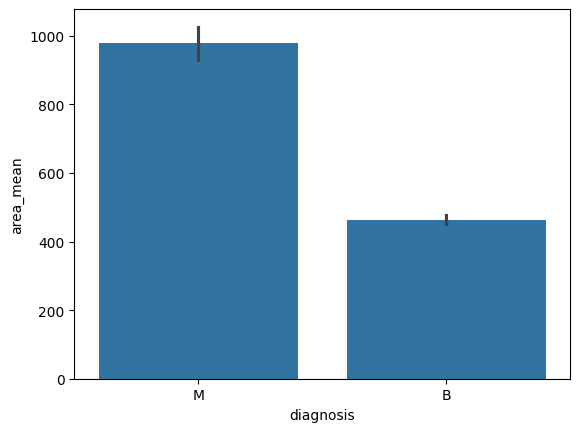

In [18]:
sns.barplot(x='diagnosis',y='area_mean',data=df)

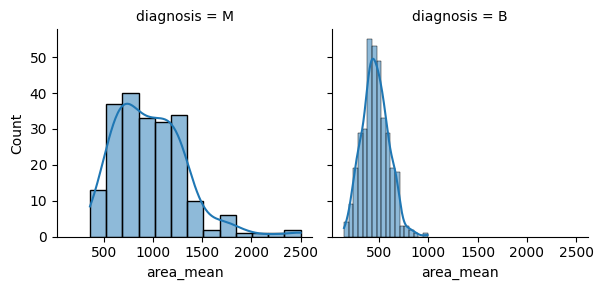

In [22]:
grid = sns.FacetGrid(df,col = "diagnosis")
grid.map(sns.histplot,"area_mean",kde=True)
grid.add_legend()

In [19]:
sns.pairplot(df)

In [23]:
df.replace({"diagnosis":{"M":0,"B":1}},inplace=True)

/tmp/ipython-input-3772290423.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"diagnosis":{"M":0,"B":1}},inplace=True)


<Axes: >

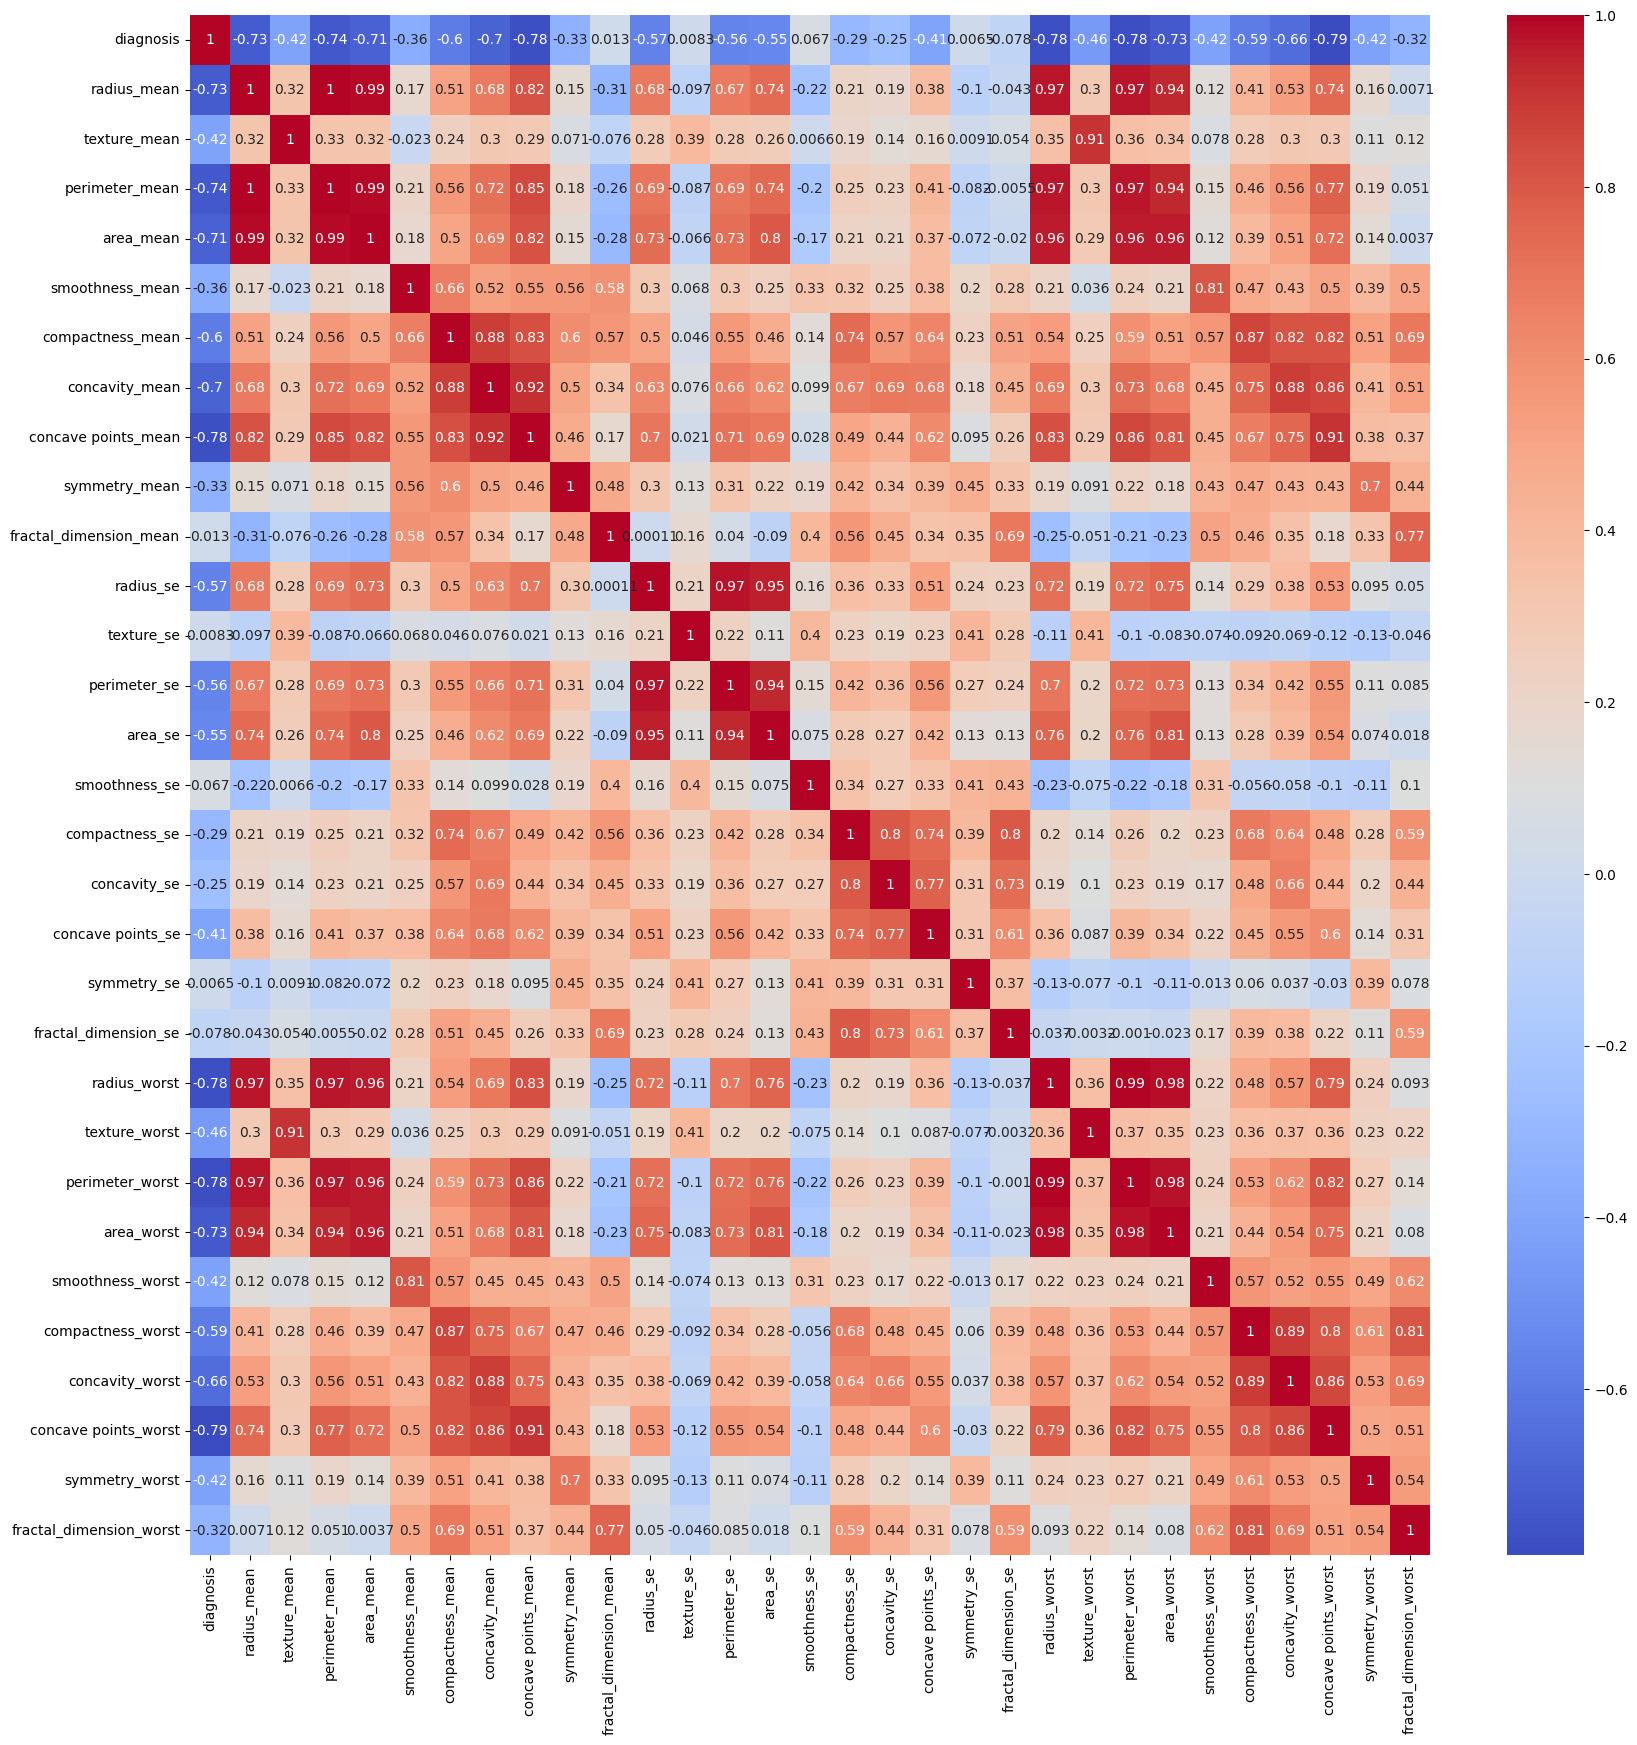

In [24]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap="coolwarm",annot=True)

In [25]:
df.drop(columns=["radius_mean","perimeter_mean","area_mean","radius_worst","perimeter_worst"],axis=1,inplace=True)

<Axes: >

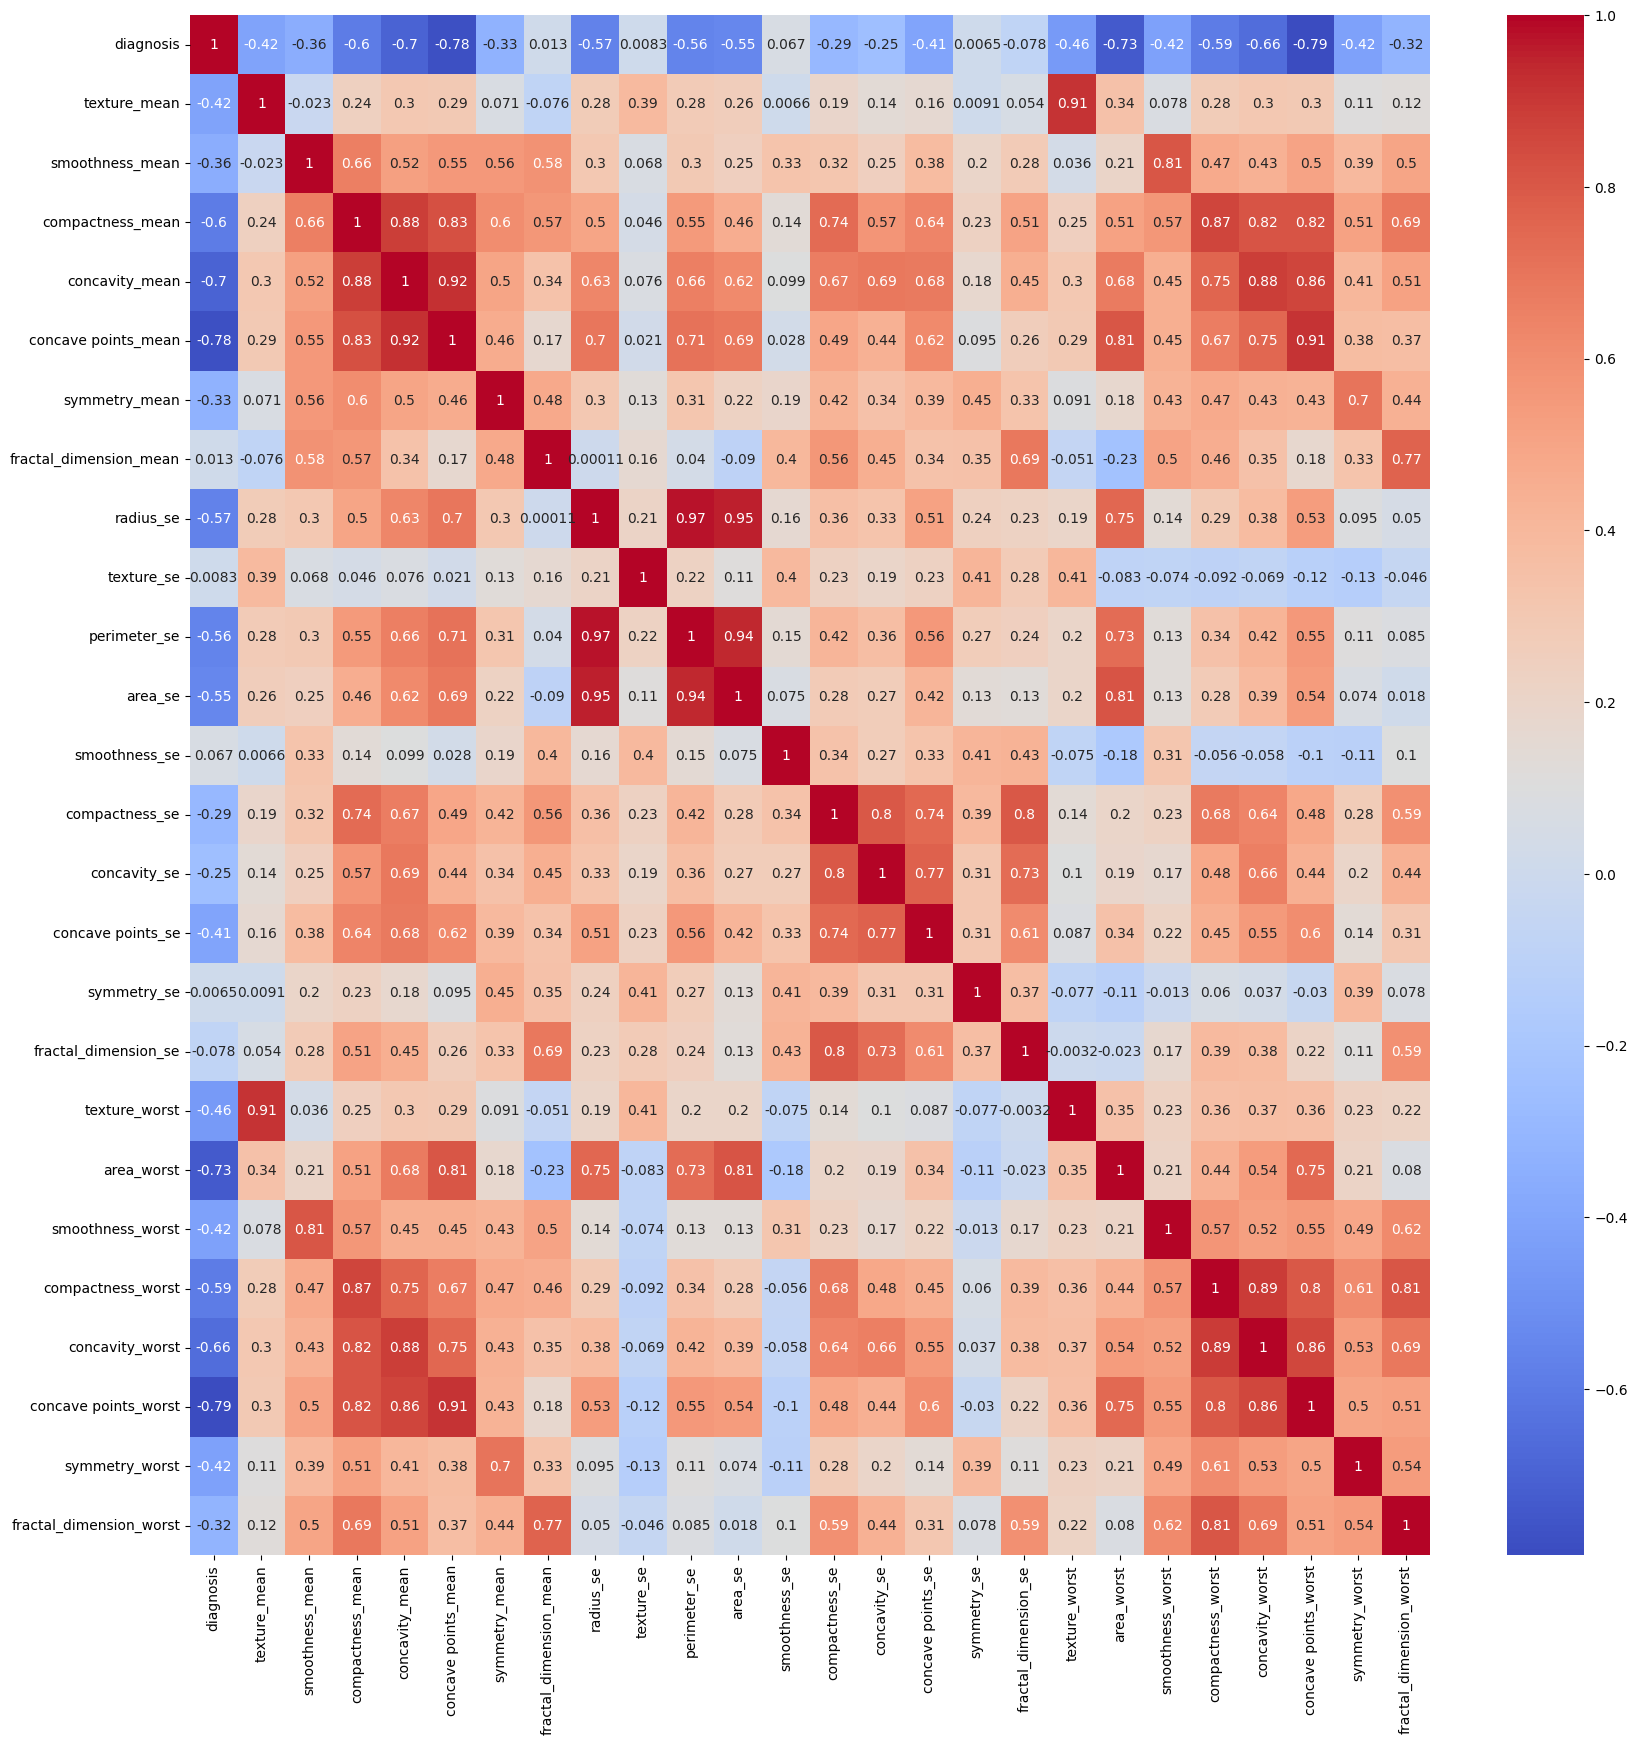

In [26]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap="coolwarm",annot=True)

In [27]:
df.drop(columns=["concavity_worst","compactness_mean","concavity_mean","concave points_mean"],inplace = True)

<Axes: >

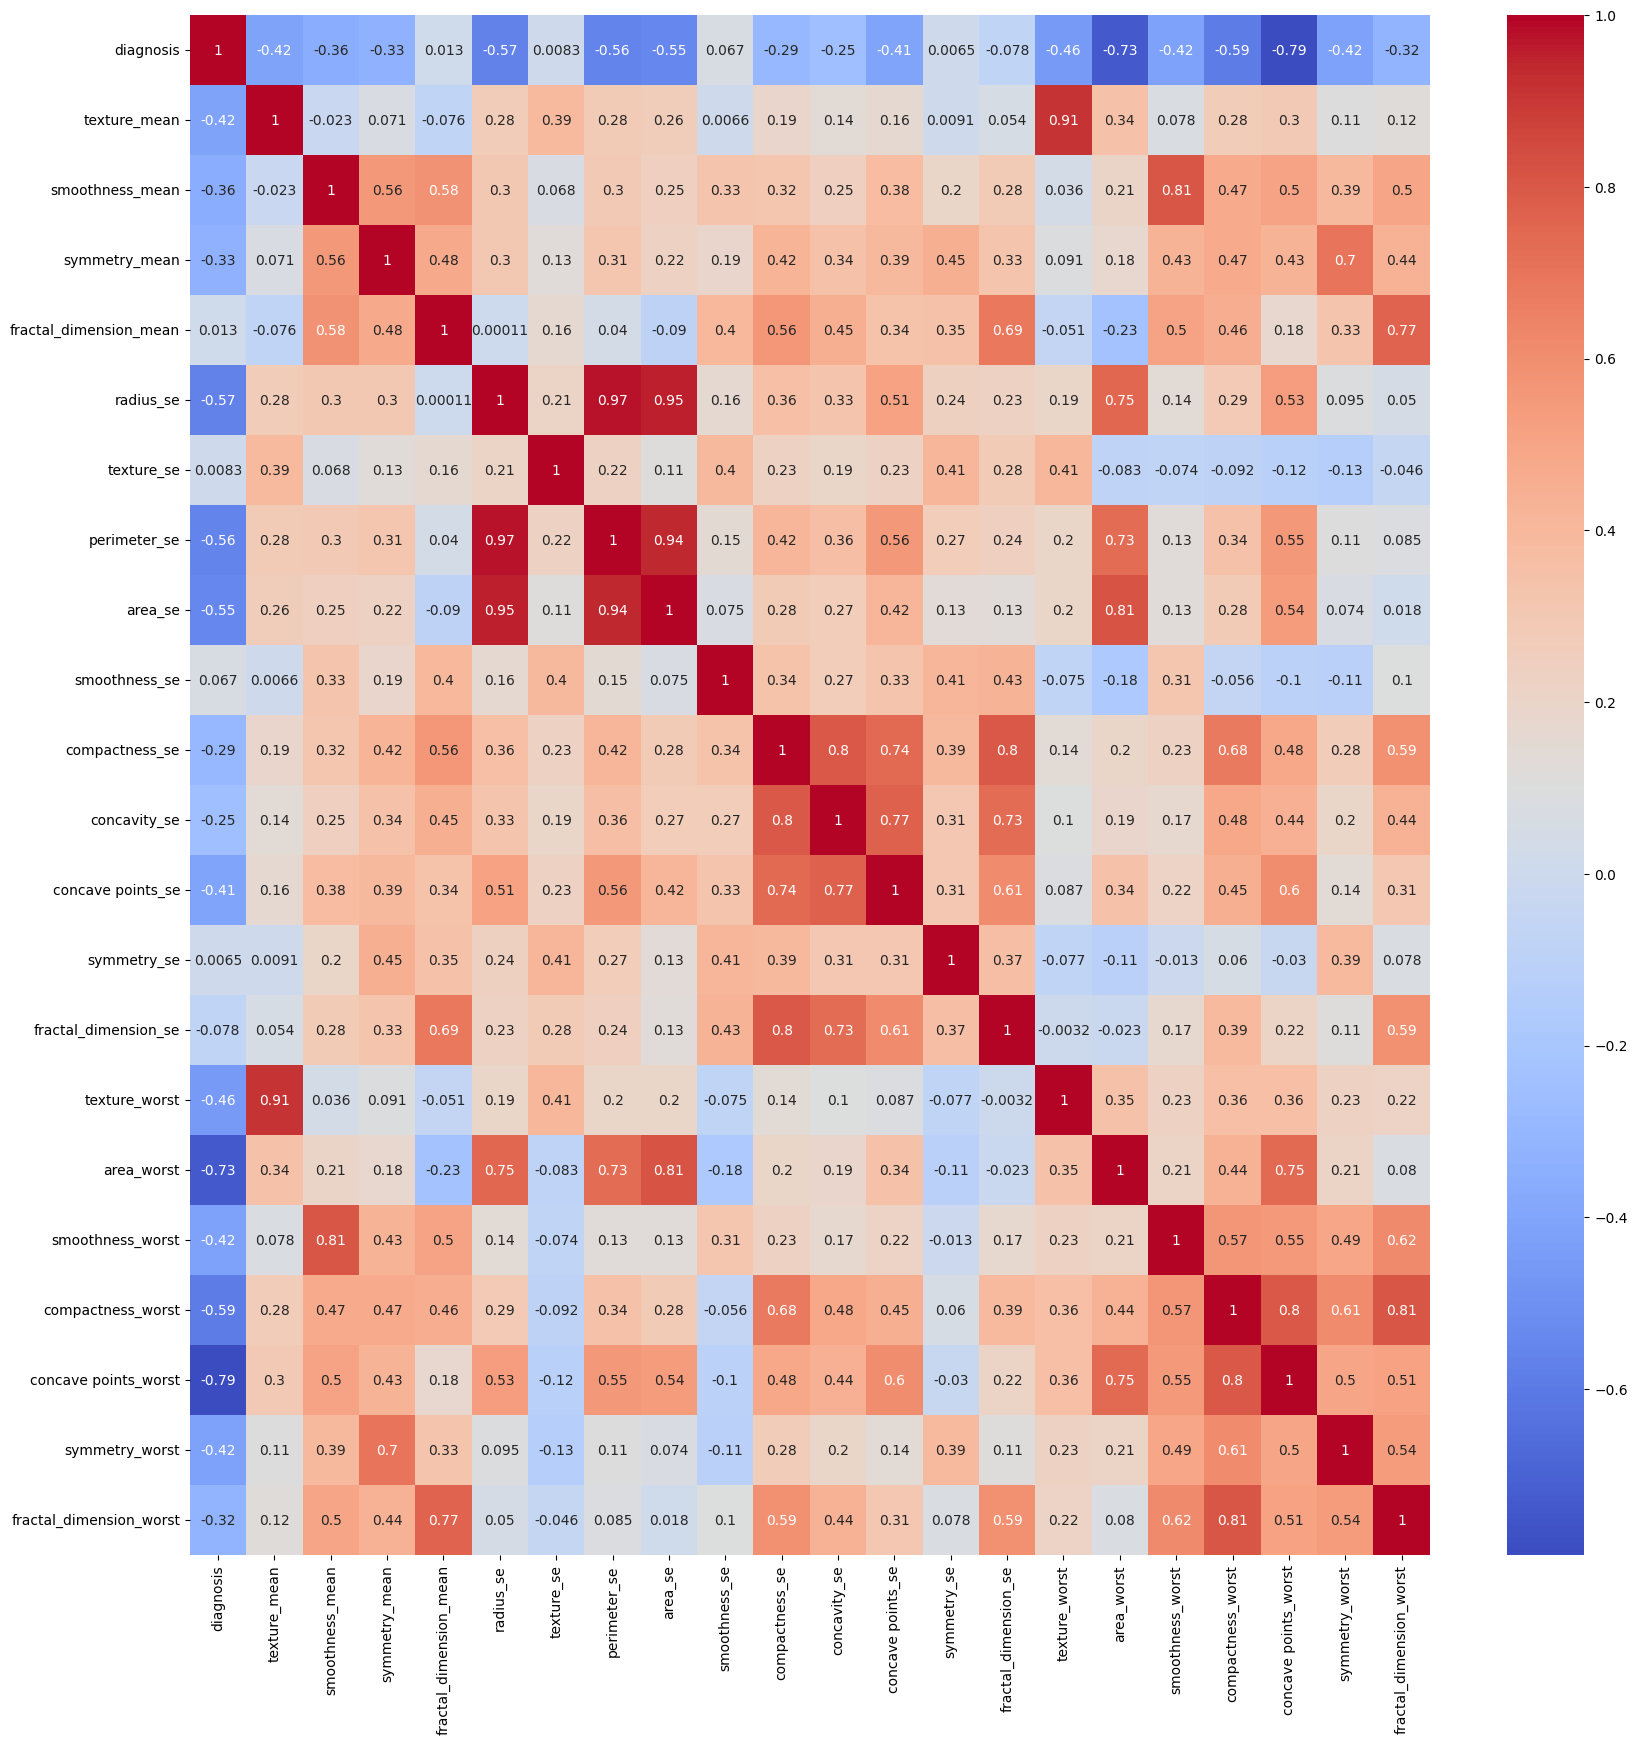

In [28]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap="coolwarm",annot=True)

In [29]:
df.drop(columns=["texture_worst"],inplace = True)

In [30]:
X=df.drop(columns=["diagnosis"], axis=1)
Y= df["diagnosis"]

In [31]:
x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [32]:
columns = x_train.columns

In [33]:
scaler = StandardScaler()
scale_model = scaler.fit(x_train)
x_train_scales= scale_model.transform(x_train)
x_test_scales= scale_model.transform(x_test)

In [34]:
x_train_scales = pd.DataFrame(x_train_scales,columns=columns)
x_test_scales = pd.DataFrame(x_test_scales,columns=columns)

In [35]:
XBC= XGBClassifier()
model = XBC.fit(x_train_scales,y_train)

In [36]:
y_predict=model.predict(x_test_scales)

In [37]:
confusion_matrix(y_test,y_predict)

array([[ 64,   3],
       [  0, 104]])

In [38]:
f1_score(y_test,y_predict)

0.985781990521327

In [39]:
!pip install imblearn
